In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from numpy.linalg import inv, pinv

In [36]:
# MAT 파일 불러오기
mat_path = r"/Users/toastceo/Desktop/연세대/과제/HW1_package/hw1_prob2.mat"
mat_data = scipy.io.loadmat(mat_path)

In [3]:
# MAT 파일에서 데이터 추출
A = mat_data['A']
x = mat_data['x'].flatten()
y = mat_data['y'].flatten()
w = mat_data['w'].flatten()
y_orig =  mat_data['y_orig'].flatten()

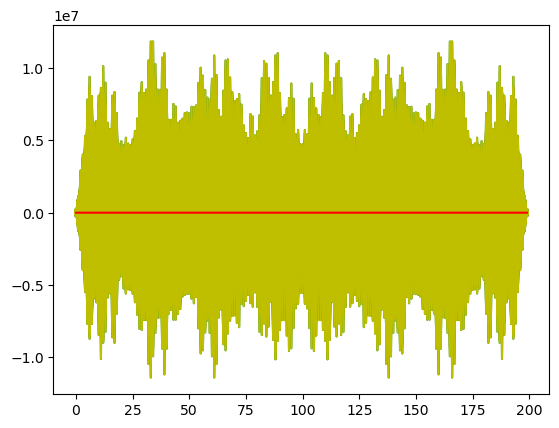

In [37]:
# problem a) 역행렬과 유사역행렬를 이용한 x 비교 
# x_inv = np.matmul(inv(A), y)
# x_pinv = np.matmul(pinv(A), y)
x_inv = inv(A)
x_pinv = pinv(A)

# 각각 plot 그리기 
l_200 = [i for i in range(200)]

I =  x_inv
P =  x_pinv

plt.plot(l_200, P, "g")
plt.plot(l_200, I, "y")
plt.plot(l_200, x, "r")

plt.show()


# for i in range(200):
#     print( "x의 값:",float(x[i]), "역행렬:", float(I.flatten()[i]),"유사역행렬:", float(P.flatten()[i]))

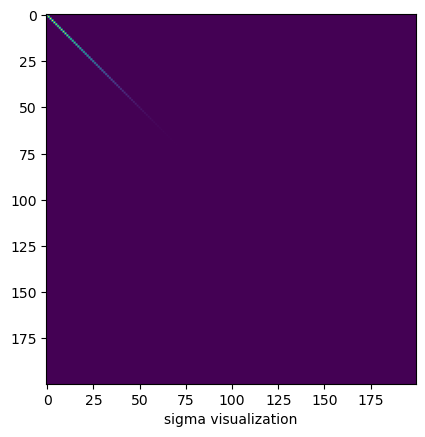

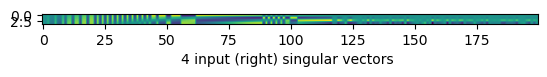

In [5]:
# problem B

U, sigma, V_T = np.linalg.svd(A)
V = np.transpose(V_T)

# 대각 행렬로 만들기 위해 diag함수 사용
sigma_diag = np.diag(sigma)
plt.xlabel("sigma visualization")
plt.imshow(sigma_diag)
plt.show()

# show the 4 input (right) singular vectors (vector v).
plt.xlabel("4 input (right) singular vectors ")
plt.imshow(V[:4,])
plt.show()

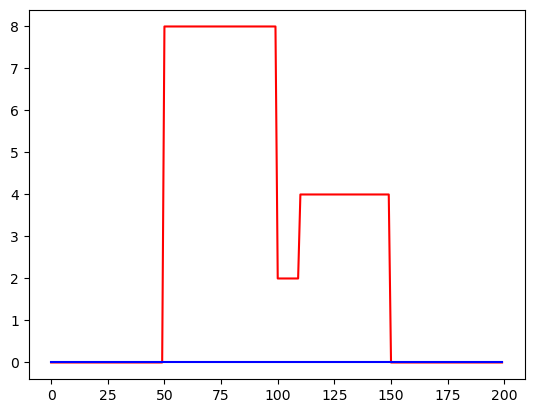

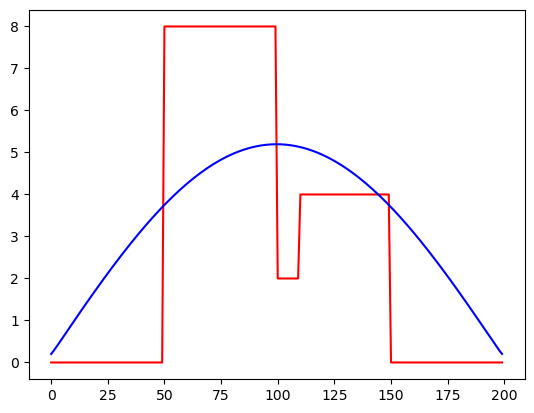

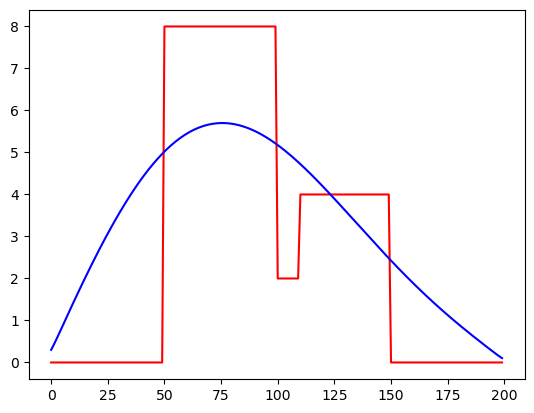

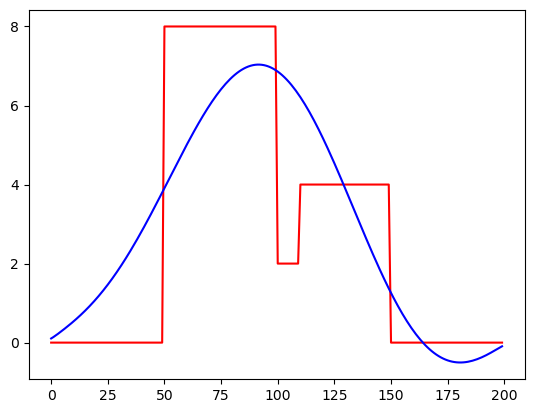

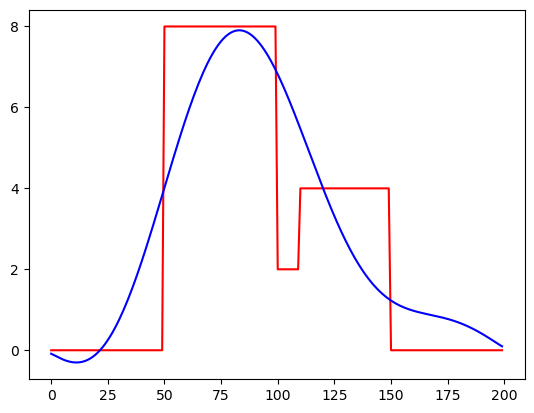

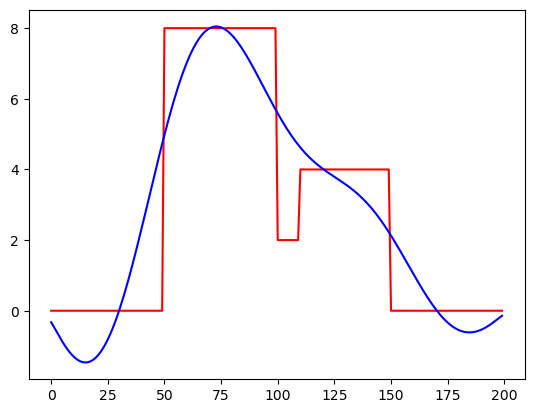

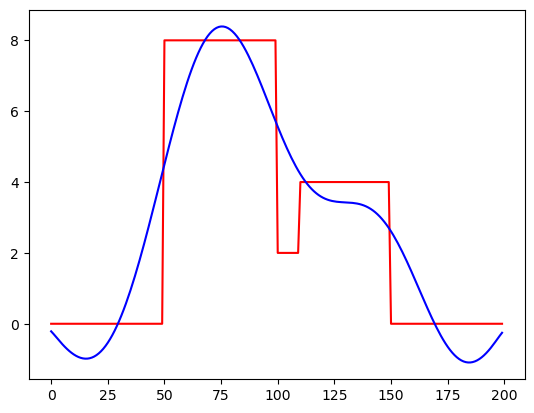

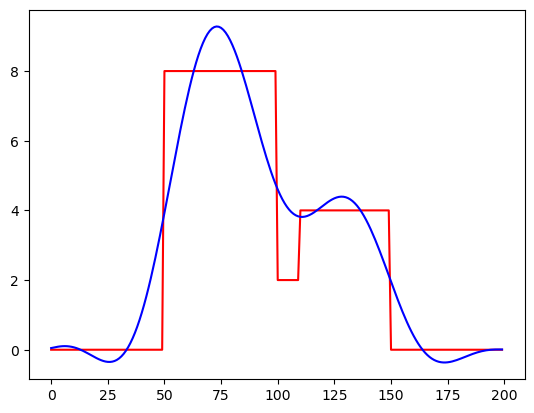

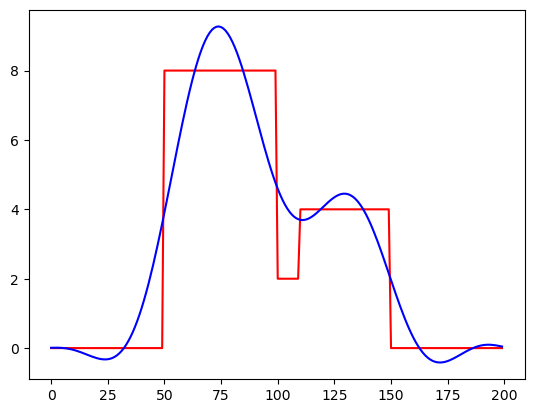

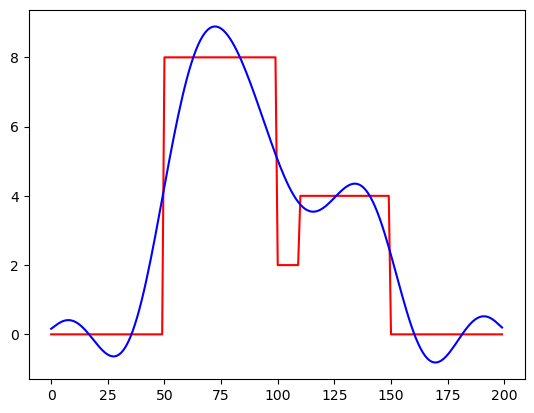

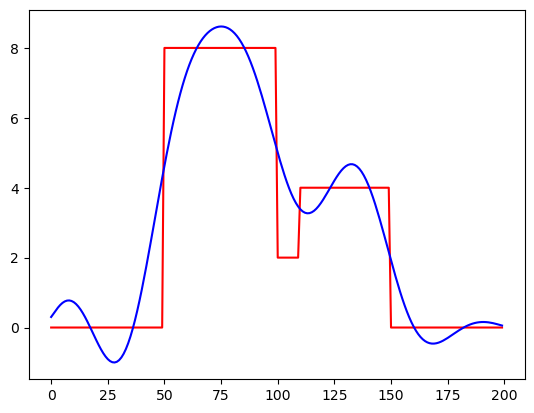

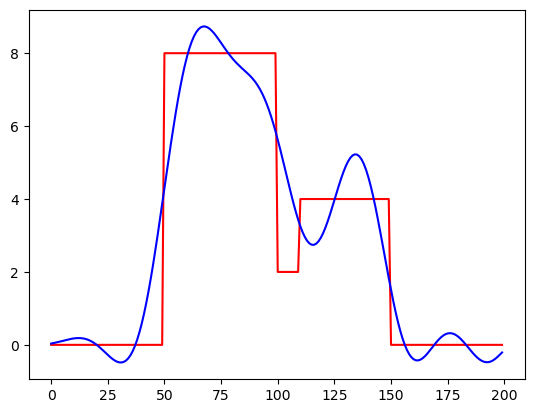

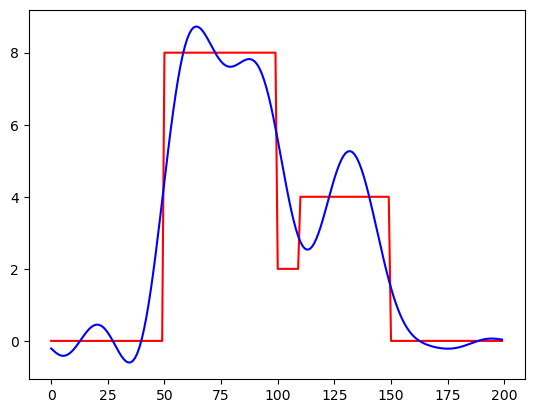

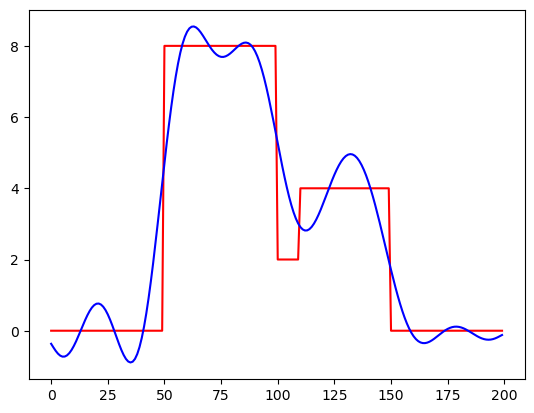

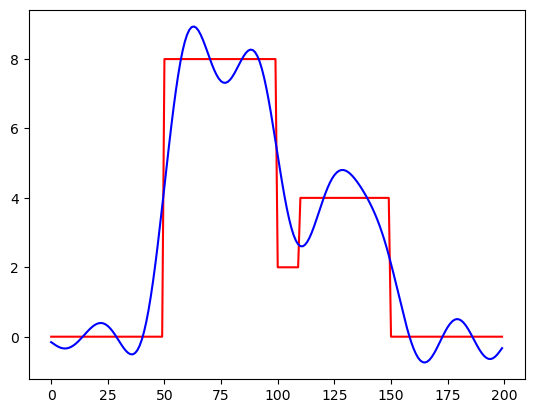

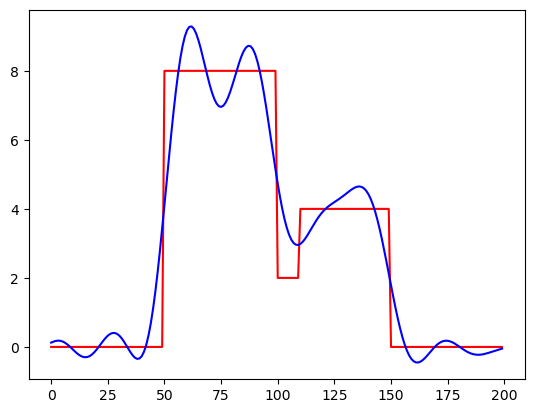

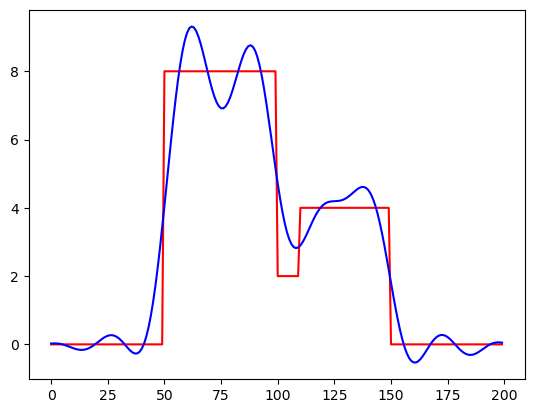

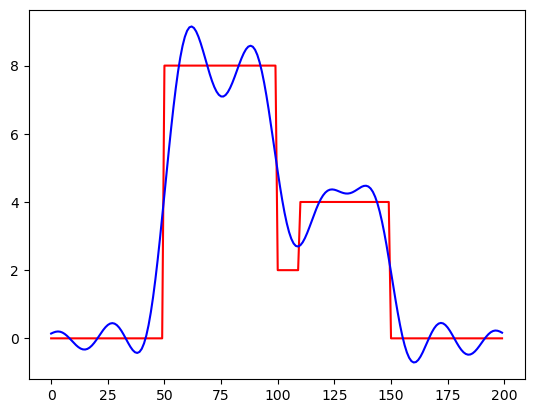

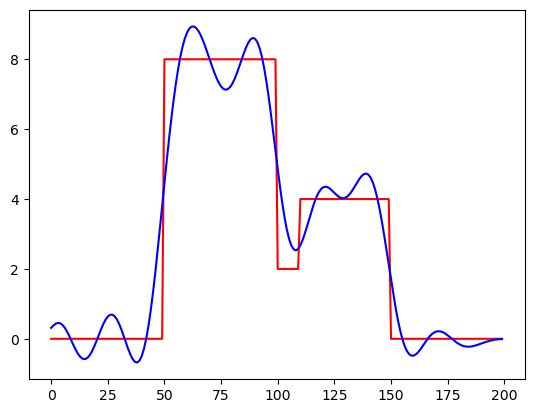

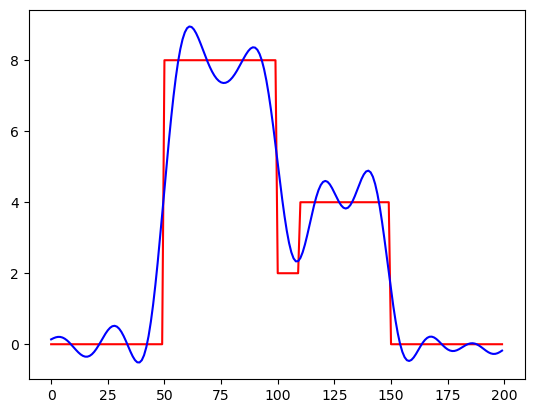

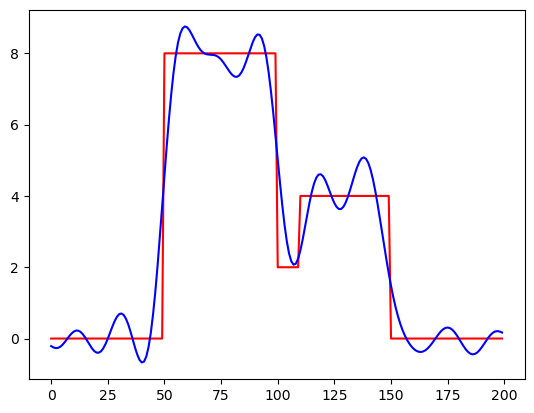

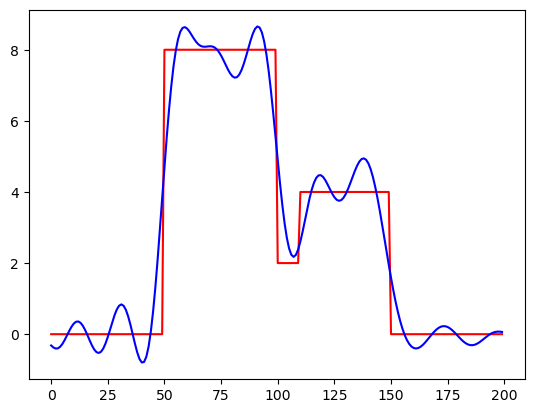

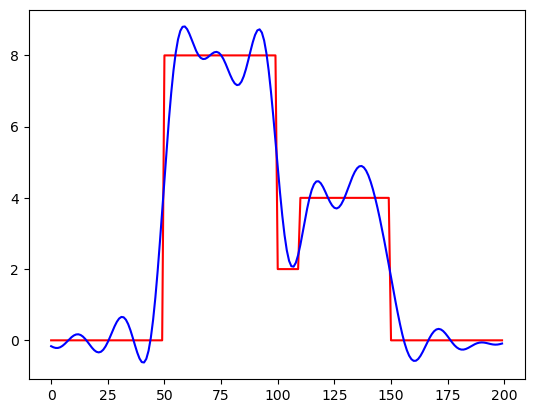

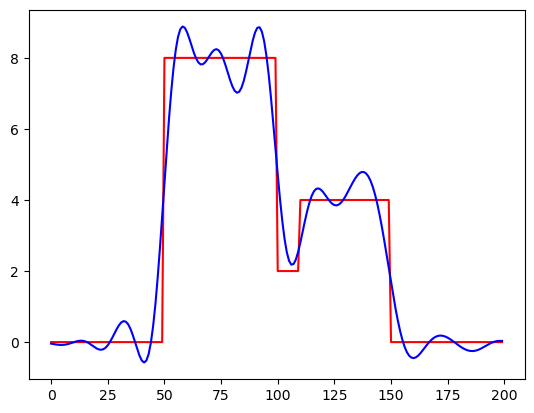

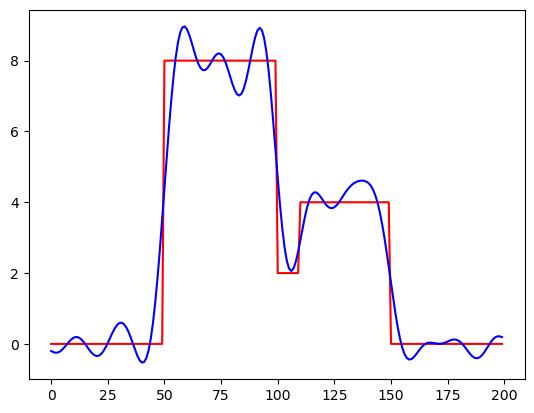

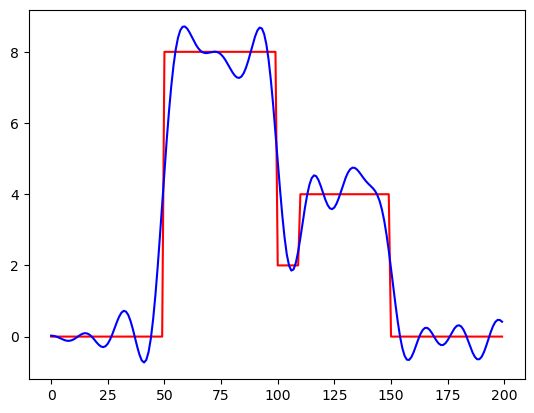

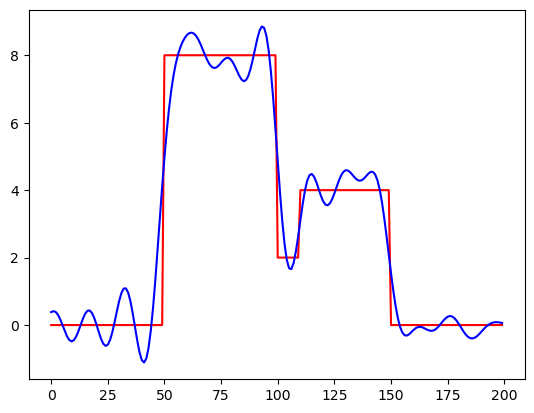

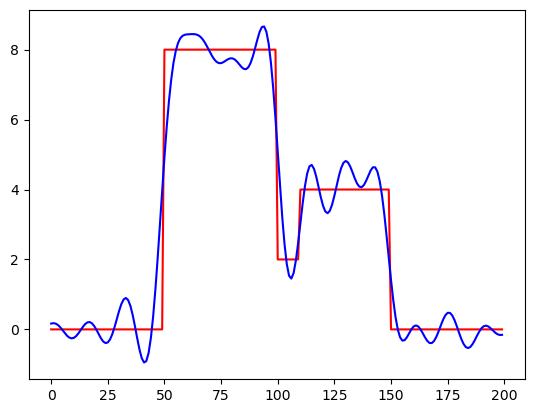

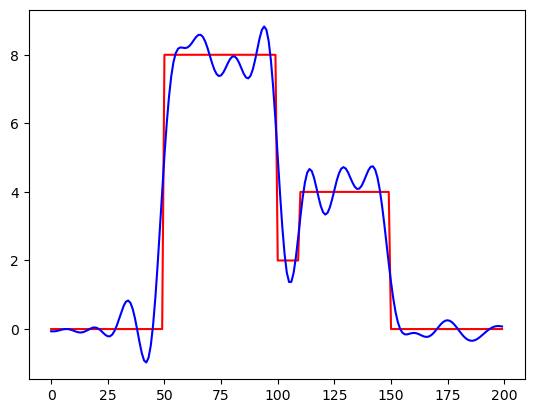

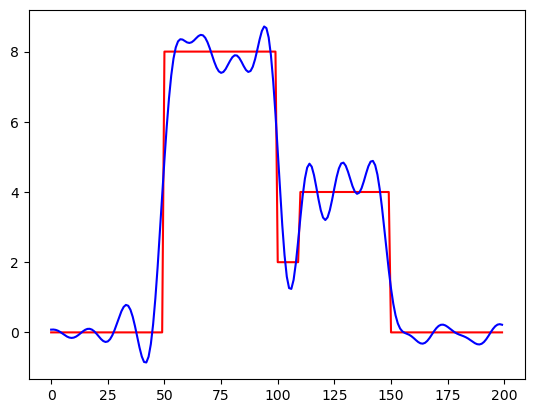

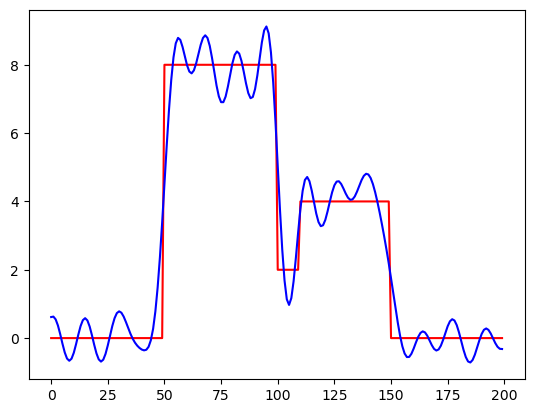

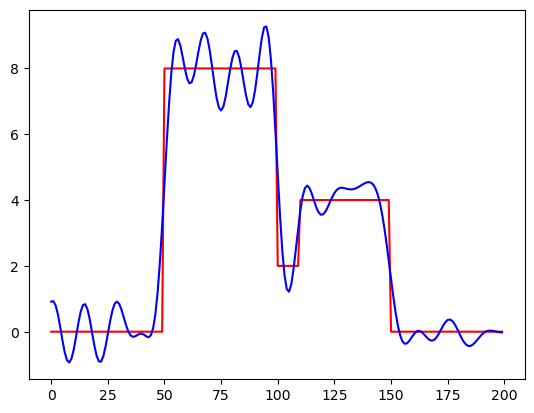

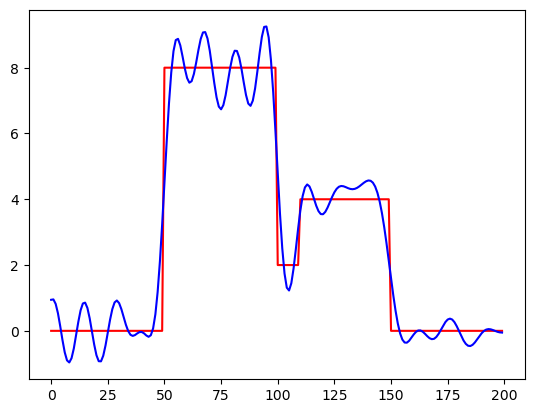

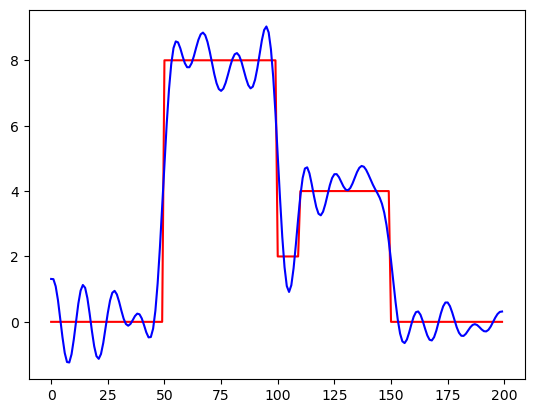

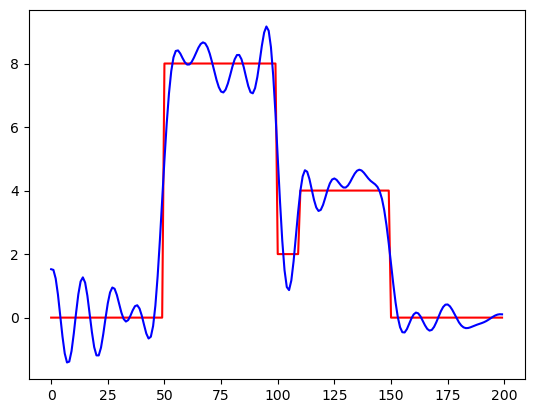

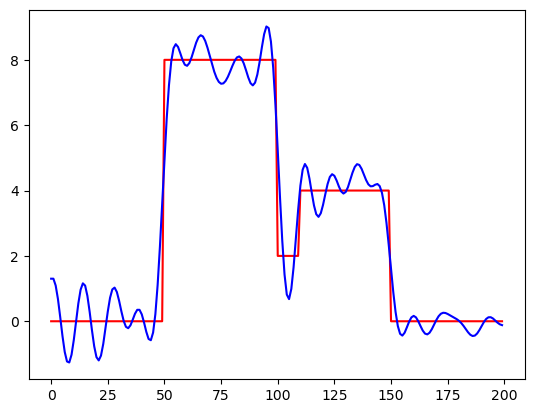

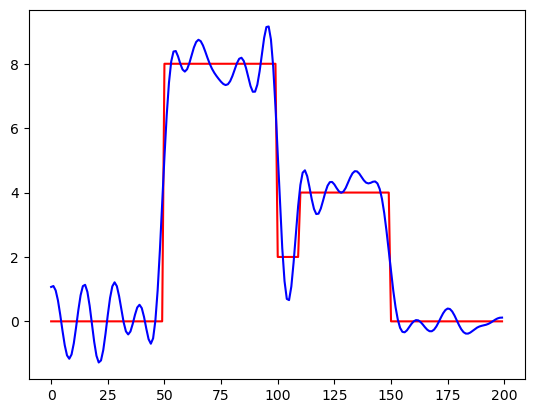

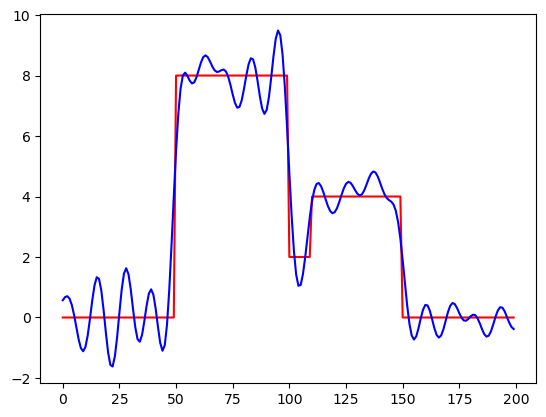

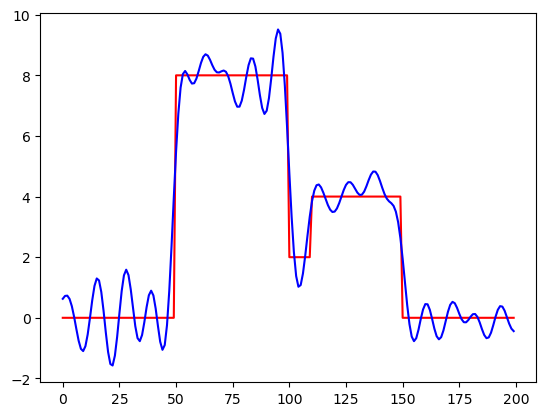

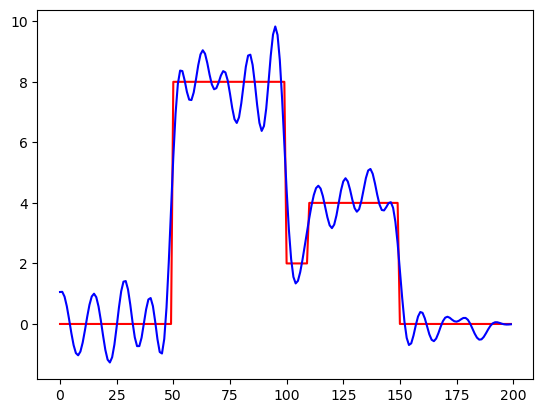

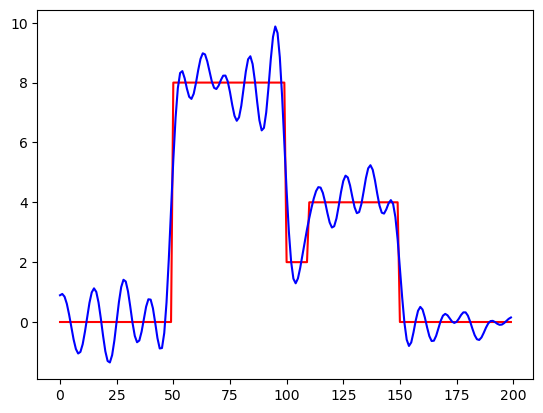

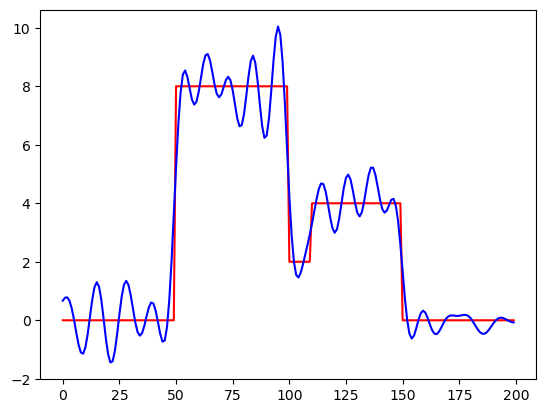

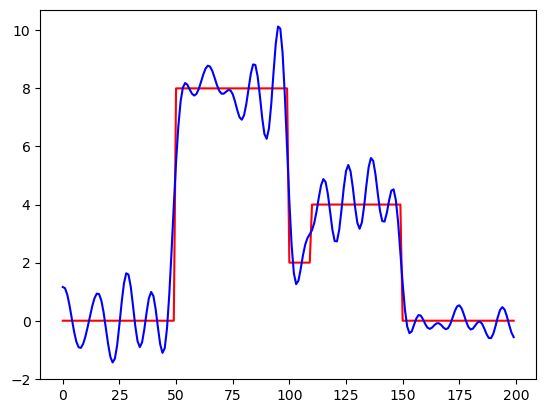

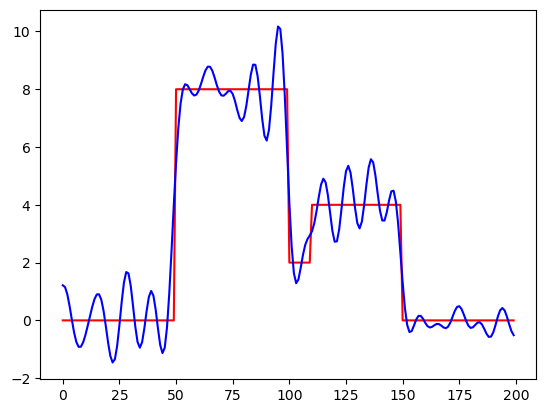

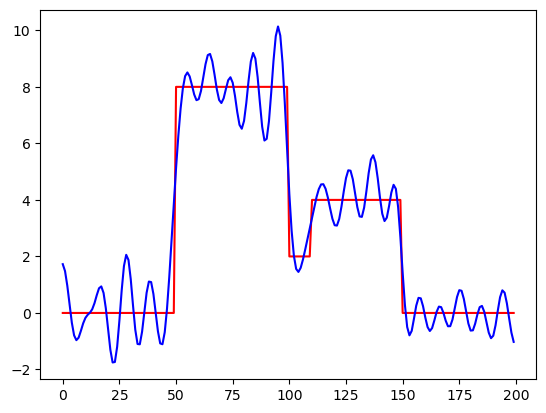

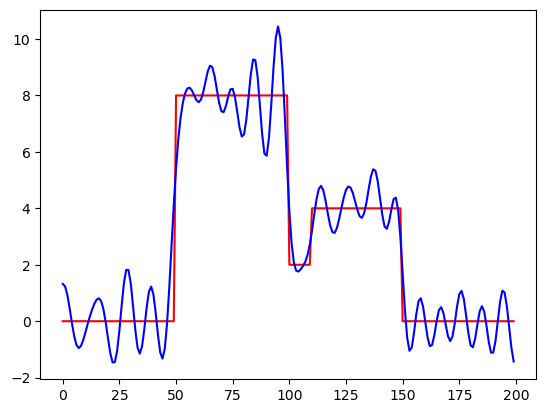

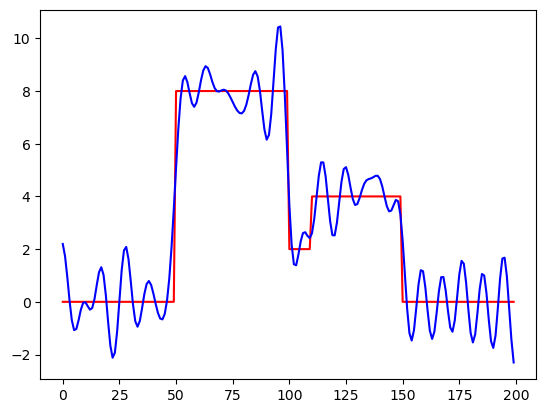

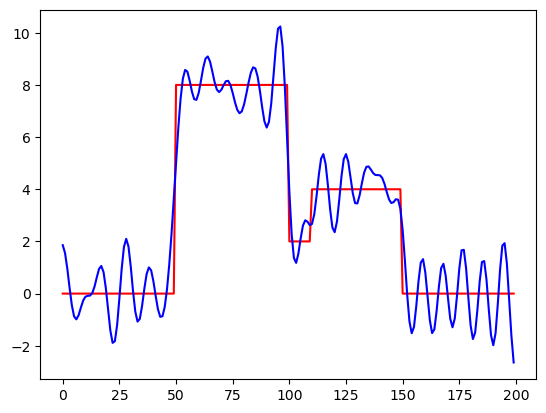

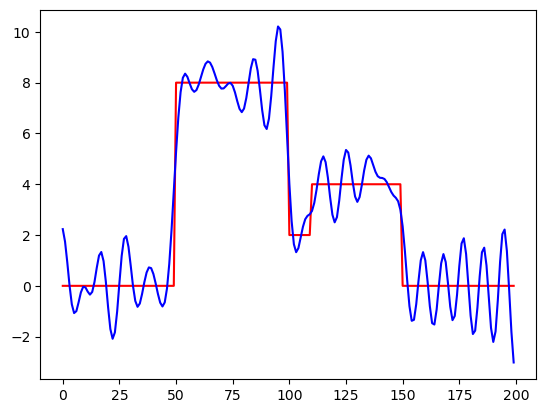

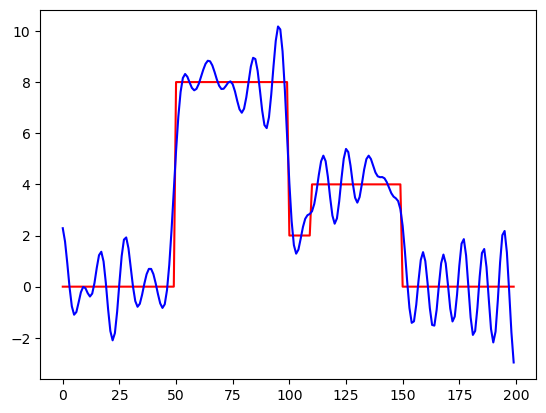

[19.4, 6.001279150552425, 5.182492965892906, 3.73977186961563, 2.843712357967688, 2.1346828859055056, 1.9860472384966332, 1.4747262475545375, 1.4688273460860755, 1.3958488224530696, 1.335896853310926, 1.2525231069494547, 1.0944215623914315, 1.008857539608908, 0.9439122813883448, 0.8216909592457126, 0.8110031886209302, 0.7911794020595255, 0.7609194124474982, 0.7074934319289619, 0.6389528613385085, 0.6252564482583227, 0.59224281314482, 0.5619111249493194, 0.5593943894459966, 0.550047585708735, 0.5687722186890097, 0.5250946584905097, 0.49590571958414786, 0.5138345802189183, 0.5622607034577293, 0.5472332209109659, 0.5487706417602992, 0.568246832586745, 0.5748755837340798, 0.5465990702462595, 0.5378357319524038, 0.6125310551034244, 0.6085409474374769, 0.6046372546361678, 0.611756100891103, 0.6339213854962185, 0.6989398626291458, 0.7068737834645364, 0.8295262643688908, 0.865993525566918, 1.0201732372787624, 1.102038453519822, 1.150556603297482, 1.152056430342057]


In [6]:
# problem C
# x = V * St * Ut * y


norm = []
component_range = 50
for idx in range(component_range):
    x_hat = np.matmul(np.matmul(np.matmul(V[:,:idx], np.linalg.inv( np.diag(sigma[:idx]))), np.transpose(U[:, 0:idx], (1, 0))), y)
    
    #square를 이용하여 norm을 값을 받아둠
    norm.append(np.mean(np.square(x_hat - x)))
    
    plt.plot(l_200, x, "r")
    plt.plot(l_200, x_hat, "b")
    plt.show()

# 50번째 norm이 가장 작은 것을 확인함
print(norm)

In [28]:
# problem d 
# Tychonov Regularization를 이용하여 mu 찾기 
mu = 0.1 
A_T = np.transpose(A)
I = np.eye(len(A))

norm = []

for idx in range(100000):
    mu = mu - 0.000001
    x_hat =  np.matmul(np.matmul(np.linalg.inv(np.matmul(A_T, A) + (mu * I)),A_T), y)
    norm.append([mu , np.mean(np.square(x_hat - x))])   
    

In [30]:
# 각 행의 두 번째 요소와 0 사이의 절대 차이를 계산
differences = [abs(row[1]) for row in norm]

# 차이가 최소인 행의 인덱스를 찾음
min_index = differences.index(min(differences))

print("0과 가장 가까운 두 번째 요소를 가진 행의 인덱스:", min_index)
print(norm[min_index])

0과 가장 가까운 두 번째 요소를 가진 행의 인덱스: 48268
[0.05173099999995173, 0.49522681750793784]


In [34]:
# 가장 작은 mu
mu = 0.051730
x_hat =  np.matmul(np.matmul(np.linalg.inv(np.matmul(A_T, A) + (mu * I)),A_T), y)

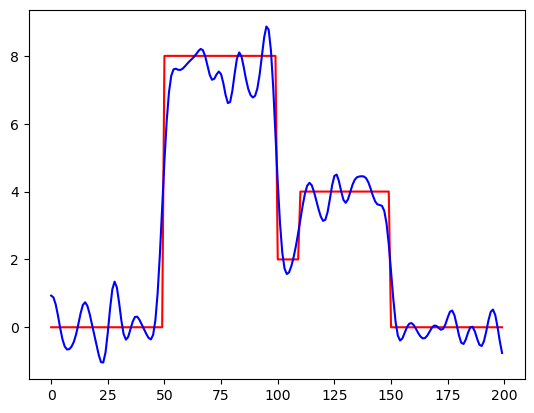

In [35]:
# problem D 확인
plt.plot(l_200, x, "r")
plt.plot(l_200, x_hat, "b")
plt.show()